In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# 🔍 Print the actual filename
print(uploaded.keys())

# ✅ Use the correct filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving placement.csv to placement.csv
dict_keys(['placement.csv'])


STEP 1

simple linear regression (1 input/1 output)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

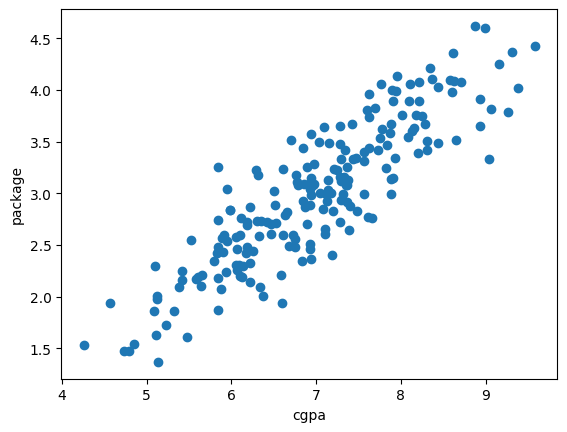

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("cgpa")
plt.ylabel("package")

In [ ]:
#EXTRACTING X AND y
X=df.iloc[:,0:1]
y=df.iloc[:,-1]
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [ ]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
from sklearn.model_selection import train_test_split #train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression() # creating the model

In [ ]:
lr.fit(X_train, y_train) #training the model


LinearRegression()

In [ ]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [ ]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [ ]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'package')

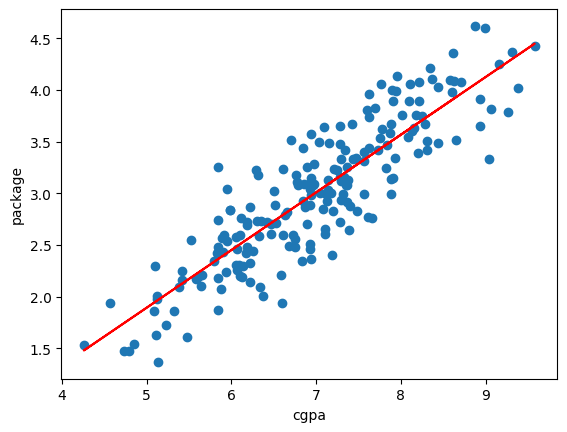

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color="red")
plt.xlabel("cgpa")
plt.ylabel("package")

In [ ]:
m=lr.coef_

In [ ]:
b=lr.intercept_

In [ ]:
#y=mx+b
m*8.58 + b

#m is actually the weightage of how much the cgpa influences package
#if the term mx is zero b is the offset

array([3.89111601])

REGRESSION METRICES

In [ ]:
 from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
#MEAN ABSOLUTE ERROR
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [ ]:
#MEAN SQUARED ERROR
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [ ]:
# ROOT MEAN SQUARED ERROR
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [ ]:
#R2 SCORE
print("MSE",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

MSE 0.780730147510384


In [ ]:
#ADJUSTED R2 SCORE
X_test.shape

(40, 1)

In [ ]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

ADJUSTED R2 SCORE CASES

CASE 1 :  ADDING AN IRRELEVANT COLOUMN AND OBSERVING R2 AND ADJUSTED R2 SCORE

In [ ]:
new_df1 = df.copy()
new_df1['random'] = np.random.random(200)
new_df1 = new_df1[['cgpa', 'random', 'package']]
new_df1.head()


,cgpa,random,package
0,6.89,0.608800,3.26
1,5.12,0.779467,1.98
2,7.82,0.201839,3.25
3,7.42,0.320461,3.67
4,6.94,0.657716,3.57


Text(0, 0.5, 'package')

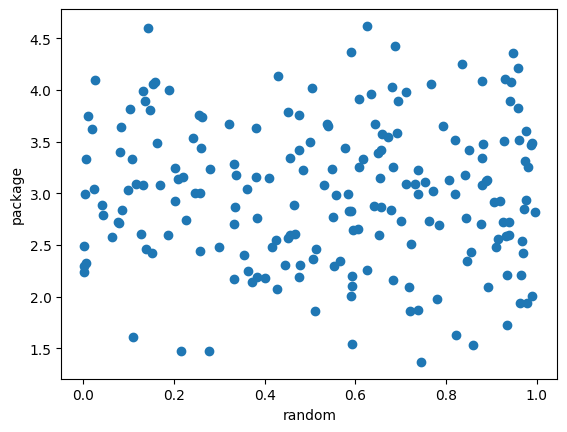

In [ ]:
plt.scatter(new_df1['random'],new_df1['package'])
plt.xlabel("random")
plt.ylabel("package")

In [ ]:
#EXTRACTING X AND y
X=new_df1.iloc[:,0:2]
y=new_df1.iloc[:,-1]
X


,cgpa,random
0,6.89,0.608800
1,5.12,0.779467
2,7.82,0.201839
3,7.42,0.320461
4,6.94,0.657716
...,...,...
195,6.93,0.137931
196,5.89,0.450884
197,7.21,0.549511
198,7.63,0.634252


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
lr=LinearRegression() # creating the model

In [ ]:
lr.fit(X_train, y_train) #training the model

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
#R2 SCORE
print("R2 Score",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 Score 0.7802368624465776


In [ ]:
1-((1-r2)*(40-1)/(40-1-1))

0.7744536219846454

CASE 2 : ADDING A RELEVANT COLOUMN AND OBSERVING R2 AND ADJUSTED R2 SCORE

In [ ]:
new_df2 = df.copy()
new_df2['IQ'] =new_df2['package']+( np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa', 'IQ', 'package']]

new_df2.sample(5)


,cgpa,IQ,package
9,8.31,3.21,3.51
45,7.87,4.28,3.58
110,8.18,2.76,3.76
159,8.71,4.78,4.08
183,7.28,2.72,2.72


Text(0, 0.5, 'package')

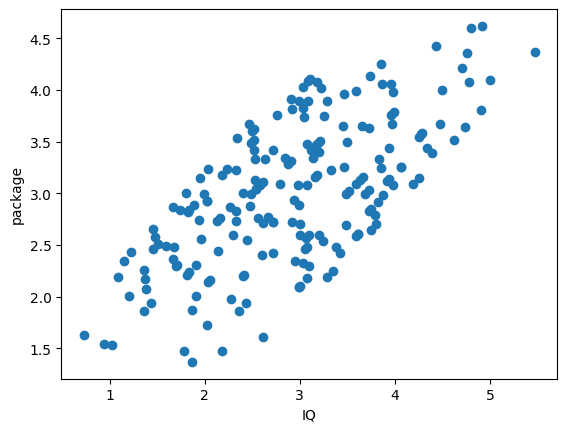

In [ ]:
plt.scatter(new_df2['IQ'],new_df2['package'])
plt.xlabel("IQ")
plt.ylabel("package")

In [ ]:
np.random.randint(-100,100)

-88

In [ ]:
#EXTRACTING X AND y
X=new_df2.iloc[:,0:2]
y=new_df2.iloc[:,-1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
lr=LinearRegression() # creating the model
lr.fit(X_train, y_train) #training the model
y_pred=lr.predict(X_test)

In [ ]:
#R2 SCORE
print("R2 Score",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 Score 0.8485231588111453


In [ ]:
1-((1-r2)*(40-1)/(40-1-1))

0.8445369261482807

#adding a relevant coloumn increases r2 score and an irrelevant coloumn decreases it which is adjusted by adjusted r2 score